### 4. Aufgabe - Communities

In [1]:
from src.Graph import Graph
import src.communities.two_plexe as Tp
import src.communities.two_plex_real as Tpr
from src.printGraph import draw_graph
import src.shortestPaths as Sp

import test_.HelperClass as Hc

import matplotlib.pyplot as plt

import time 
import random
import numpy as np

### 2 Plex Aufgabe

Wir haben erst einmal einen basic 2 Plex Algorithmus implementiert. Dieser arbeitet mit Mengen, da die meisten Graph Operationen Mengen zurückgeben (.getNeighbors bspw). Dadurch kann mit Set-Operationen wie &, -, | gearbeitet werden. 

Der Algorithmus ist rekursiv und arbeitet mit einer Menge an möglichen Kanidaten und festen Knoten. In einer Iteration wird ein Kandidat genommen und getestet ob er als fester Knoten v genommen werden kann (Die Menge der festen Knoten ist immer ein 2-plex). Nun werden 2 Fälle unterschieden: 
1. v ist im 2-plex -> v ist fester Knoten und kein Kandidat. Jetzt wird die Menge der Nicht-Nachbarn betrachtet: Laut Aufgabe kann höchstens ein Nicht-Nachbar im 2-plex sein. Also wird über alle nicht-Nachbarn iteriert und der Fall betrachtet, dass sie im 2-plex sind. Außerdem wird der Fall betrachtet, dass keiner der Nicht-Nachbarn im 2-Plex sind

2. v ist nicht im 2-plex -> d.h. v kann einfach gelöscht werden aus den Kandidaten.

Anschließend haben wir die Verbesserungen der Reihe nach implementiert.

Dann haben wir noch einen zweiten Algorithmus gemäßt der Aufgabenstellung implementiert.

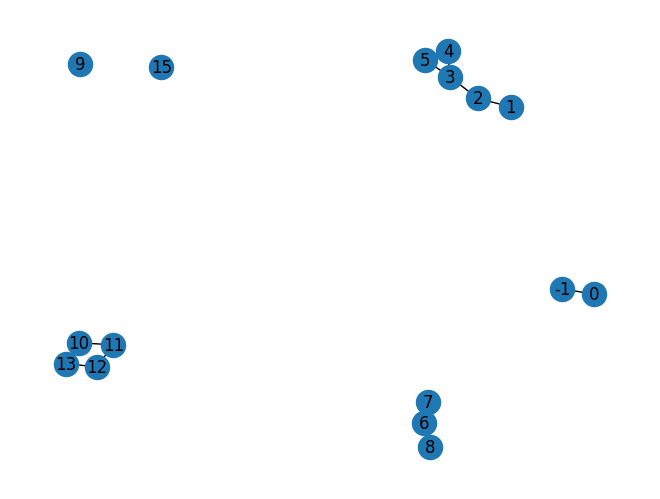

In [2]:
# Wir werden zunächst auf folgendem Graphen arbeiten
G, _, _ = Hc.create_graph()
draw_graph(G, label_on=True)

# Der größte 2-plex ist {10, 11, 12, 13}

In [3]:
# 1. Wie werden die Algorithmen ausgeführt und was ist die Ausgabe?

for i in range(4):
    print(Tp.search_2_plex(G, version=i))

print("")

for i in range(4):
    print(Tpr.search_2_plex_version(G, version=i))

{'12', '10', '11', '13'}
{'12', '10', '11', '13'}
{'12', '10', '11', '13'}
{'12', '10', '11', '13'}

{'12', '10', '11', '13'}
{'11', '10', '13', '12'}
{'11', '10', '13', '12'}
{'11', '10', '13', '12'}


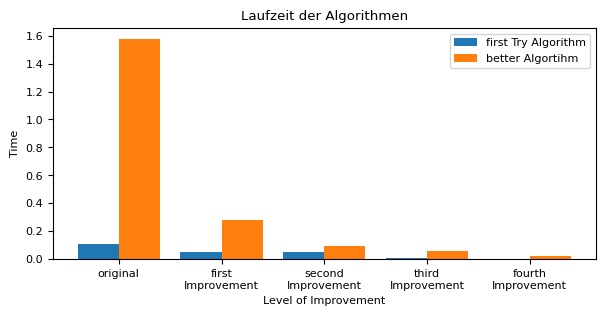

In [4]:
# Laufzeit -> Vergleich aller 5 Varianten auf Karate Netzwerk 
# Vergleich determinisitisch vs nicht-deterministisch
plt.rcParams.update({'font.size': 8})

G = Graph("networks/out.ucidata-zachary_")

names = ["original", "first\nImprovement", "second\nImprovement", 
         "third\nImprovement", "fourth\nImprovement"]
times = []
times_det = []

for i in range(len(names)):
    start_time = time.time()
    Tp.search_2_plex(G, version=i)
    times.append(time.time() - start_time)

    if i != 4:
        start_time = time.time()
        Tpr.search_2_plex_version(G, version=i)
        times_det.append(time.time() - start_time)
    else:
        start_time = time.time()
        Tpr.search_2_plex_main(G)
        times_det.append(time.time() - start_time)
  
fig = plt.figure(figsize=(7, 3))

X_axis = np.arange(len(names))
  
plt.bar(X_axis - 0.2, times, 0.4, label = 'first Try Algorithm')
plt.bar(X_axis + 0.2, times_det, 0.4, label = 'better Algortihm')
  
plt.xticks(X_axis, names)
plt.xlabel("Level of Improvement")
plt.ylabel("Time")
plt.title("Laufzeit der Algorithmen")
plt.legend()
plt.show()

Meine Vermutung warum der "better" Algorithmus nicht besser abschneidet ist, dass ziemlich oft degeneracy Sorting ausgeführt wird und das sich nicht wirklich lohnt, weil der Graph so klein ist. Auf größeren Graphen sollte es demnach besser sein.

Verbesserungen des "better" Algorithmus:
1. Heuristik zur Bestimmung eines größten 2-plexes -> Greedy. Danach können alls Knoten mit zu wenig Grad rausgenommen werden
2. Wenn ich bei der Rekursion einen Graph treffe, der weniger oder gleich viele Knoten wie der maximale 2-plex hat, so kann ich ihn direkt ausschließen
3. Wir betrachten einen Knoten und löschen alle Knoten, die nicht in der 2er Nachbarschaft dieses Knotens sind
4. Lösche Knoten, die nicht genug Nachbarn haben (wie 2, wird aber auf dem Graphen aus 3. ausgeführt)

In [5]:
# karate netzwerk, etwa 40 Knoten, 80 Kanten
G = Graph("networks/out.ucidata-zachary_")

print(Tpr.search_2_plex_main(G))
print(Tp.search_2_plex(G))

{'4', '2', '14', '3', '8', '1'}
{'4', '2', '14', '3', '8', '1'}


In [3]:
# out.adjnoun_adjacency_adjacency, etwa 100 Knoten und 430 Kanten
G = Graph("networks/out.adjnoun_adjacency_adjacency_")

start = time.time()
print(Tpr.search_2_plex_main(G))
print(f"Better Algorithm needed time {time.time() - start}\n")

start = time.time()
print(Tp.search_2_plex(G))
print(f"Other Algorithm needed time {time.time() - start}")

{'18', '3', '51', '52', '22', '55'}
Better Algorithm needed time 5.8564558029174805

{'18', '3', '51', '52', '22', '55'}
Other Algorithm needed time 0.12512731552124023


Okay anscheinend ist der "normale" Algorithmus noch nicht genug verbessert worden. Kann auch sein, dass Funktionen wie das Degeneracy Sorting nicht genug optimiert wurden.

In [2]:
# Laufzeit auf econ Netzwerk - wm1 300 Knoten, 3000 Kanten
G = Graph("networks/econ_networks/econ-wm1.mtx")

start = time.time()
print(Tpr.search_2_plex_main(G))
print(f"Better Algorithm needed time {time.time() - start}\n")

start = time.time()
print(Tp.search_2_plex(G))
print(f"Other Algorithm needed time {time.time() - start}")

{'24', '31', '40', '28', '30', '43', '44', '46', '36', '23', '267', '45', '49', '26', '54', '25', '48', '32', '29', '261', '42', '34', '37', '50', '27', '99', '41', '47', '22'}
Better Algorithm needed time 30.38050937652588

{'24', '31', '28', '30', '43', '44', '46', '36', '267', '45', '26', '49', '25', '39', '48', '32', '55', '29', '42', '34', '37', '27', '50', '41', '47', '38', '18', '22'}
Other Algorithm needed time 317.72238540649414
